# TP1 - COMPUTER VISION I

In [1]:
# ---------------- Paquetes a utilizar ----------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


import cv2 as cv



### Parte 1 (imágenes en white_patch y coord_cromaticas) 
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.



In [2]:
# ---------------- Mapeo de paths ----------------
# Hay que mapear los pahts de los archivos y dejarlos en un array para después utilizar en función iterativa

folderCC = 'coord_cromaticas'

CCimg_paths= []

for file_name in os.listdir(folderCC):

    full_path = os.path.join(folderCC, file_name)
    CCimg_paths.append(full_path)

In [3]:
def coord_cromaticas(img, show_layers=False):

    # Hay que separar los canales de colores: Red | Green | Blue
    im_red, im_gre, im_blu = cv.split(img)

    # Los arrays del split quedan con un tipo de formato int entre 0-255
    # Hay que pasarlo a float para haga bien la suma
    im_red = im_red.astype(np.float32)
    im_gre = im_gre.astype(np.float32)
    im_blu = im_blu.astype(np.float32)

    # Sobre la base que normaliza es la suma de los 3 canales
    denom = im_red + im_gre + im_blu

    # Si se llega a dar la casualidad de que en las 3 matrices esté el valor 0 en i,j
    # se rompería el código, así que hay que imputar ese valor
    denom[denom == 0] = 1

    # Se crea el descriptor 
    descriptor = [im_red / denom,
                  im_gre / denom,
                  im_blu / denom]
    
    # Por si se quiere generar un output de los layers
    if show_layers:
        print('RED \n', im_red, '\n', 'GREEN \n', im_gre, '\n', 'BLUE \n', im_blu)
        print('----------------------------------------------------------- \n')
        print('DENOM. \n',denom)
        print('----------------------------------------------------------- \n')
        print('DESCRIPTOR \n',descriptor)
        print('----------------------------------------------------------- \n')
        print('NUEVO RED \n', descriptor[0], '\n', 'NUEVO GREEN \n', descriptor[1], '\n', 'NUEVO BLUE \n', descriptor[2])

    image_adjusted_CC = cv.merge((descriptor[0], descriptor[1], descriptor[2]))
    
    return(image_adjusted_CC)

    



2. Implementar el algoritmo White-Patch para librarnos de las diferencias de color de iluminación.


In [4]:
# ---------------- Mapeo de paths ----------------
# Hay que mapear los pahts de los archivos y dejarlos en un array para después utilizar en función iterativa

folderWW = 'white_patch'

WPimg_paths= []

for file_name in os.listdir(folderWW):

    full_path = os.path.join(folderWW, file_name)
    WPimg_paths.append(full_path)
    

In [5]:
def white_patch(img, show_layers=False):

    # Hay que separar los canales de colores: Red | Green | Blue
    im_red, im_gre, im_blu = cv.split(img)

    # Los arrays del split quedan con un tipo de formato int entre 0-255
    # Hay que pasarlo a float para haga bien la suma
    im_red = im_red.astype(np.float32)
    im_gre = im_gre.astype(np.float32)
    im_blu = im_blu.astype(np.float32)

    # Si se llega a dar que el máximo sea 0 (sería raro),
    # se rompería el código, así que hay que imputar ese valor
    fact_red = 255/max(np.max(im_red),1)
    fact_gre = 255/max(np.max(im_gre),1)
    fact_blu = 255/max(np.max(im_blu),1)

    # Se normalizan las capas
    new_red = (im_red * fact_red).astype('int')
    new_gre = (im_gre * fact_gre).astype('int')
    new_blu = (im_blu * fact_blu).astype('int')
    
    # Por si se quiere generar un output de los layers
    if show_layers:
        print('RED \n', im_red, '\n', 'GREEN \n', im_gre, '\n', 'BLUE \n', im_blu)
        print('----------------------------------------------------------- \n')
        print('Factores Normalización. \n', 'R: ', fact_red, '\n', 'G: ', fact_gre, '\n', 'B: ', fact_blu, '\n')
        print('----------------------------------------------------------- \n')
        print('NUEVO RED \n', new_red, '\n', 'NUEVO GREEN \n', new_gre, '\n', 'NUEVO BLUE \n', new_blu)

    image_adjusted_WP = cv.merge((new_red, new_gre, new_blu))
    
    return(image_adjusted_WP)


3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White-Patch


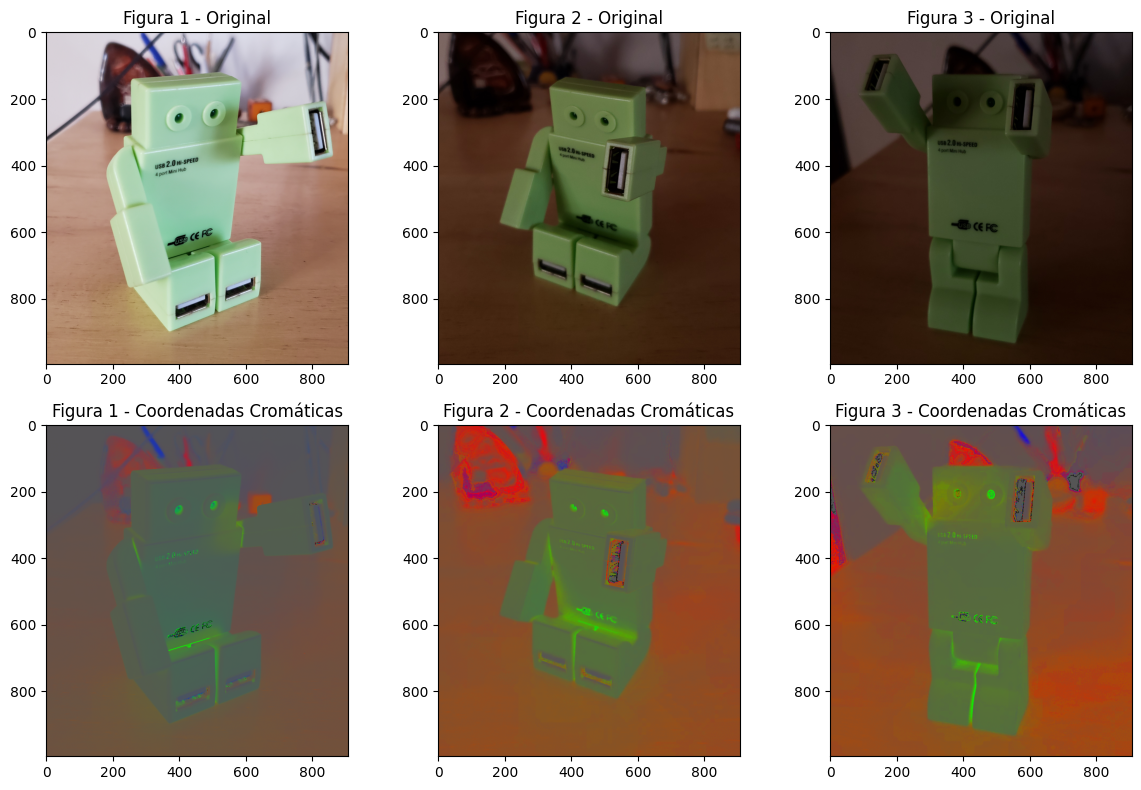

In [6]:
# ---------------- Visualización de Coordenadas Cromátricas ---------------- 

img1 = cv.imread(CCimg_paths[0]); img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread(CCimg_paths[1]); img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img3 = cv.imread(CCimg_paths[2]); img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

img1_CC = coord_cromaticas(img1, show_layers=False)
img2_CC = coord_cromaticas(img2, show_layers=False)
img3_CC = coord_cromaticas(img3, show_layers=False)


fig, axes = plt.subplots(2,3, figsize=(12,8))

axes[0,0].imshow(img1);     axes[0,0].set_title('Figura 1 - Original') 
axes[1,0].imshow(img1_CC);  axes[1,0].set_title('Figura 1 - Coordenadas Cromáticas')

axes[0,1].imshow(img2);     axes[0,1].set_title('Figura 2 - Original') 
axes[1,1].imshow(img2_CC);  axes[1,1].set_title('Figura 2 - Coordenadas Cromáticas') 

axes[0,2].imshow(img3);     axes[0,2].set_title('Figura 3 - Original')
axes[1,2].imshow(img3_CC);  axes[1,2].set_title('Figura 3 - Coordenadas Cromáticas') 

plt.tight_layout()
plt.show()

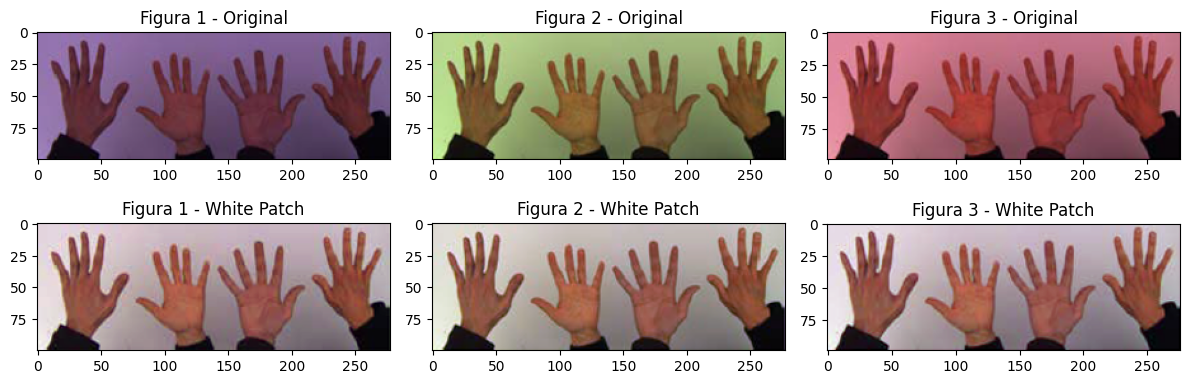

In [7]:
# ---------------- Visualización de White-Patch (Manos) ---------------- 

img1 = cv.imread(WPimg_paths[0]); img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread(WPimg_paths[1]); img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img3 = cv.imread(WPimg_paths[2]); img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

img1_WP = white_patch(img1, show_layers=False)
img2_WP = white_patch(img2, show_layers=False)
img3_WP = white_patch(img3, show_layers=False)


fig, axes = plt.subplots(2,3, figsize=(12,4))

axes[0,0].imshow(img1);     axes[0,0].set_title('Figura 1 - Original') 
axes[1,0].imshow(img1_WP);  axes[1,0].set_title('Figura 1 - White Patch')

axes[0,1].imshow(img2);     axes[0,1].set_title('Figura 2 - Original') 
axes[1,1].imshow(img2_WP);  axes[1,1].set_title('Figura 2 - White Patch') 

axes[0,2].imshow(img3);     axes[0,2].set_title('Figura 3 - Original')
axes[1,2].imshow(img3_WP);  axes[1,2].set_title('Figura 3 - White Patch') 

plt.subplots_adjust(hspace=0.1) 
plt.tight_layout()
plt.show()

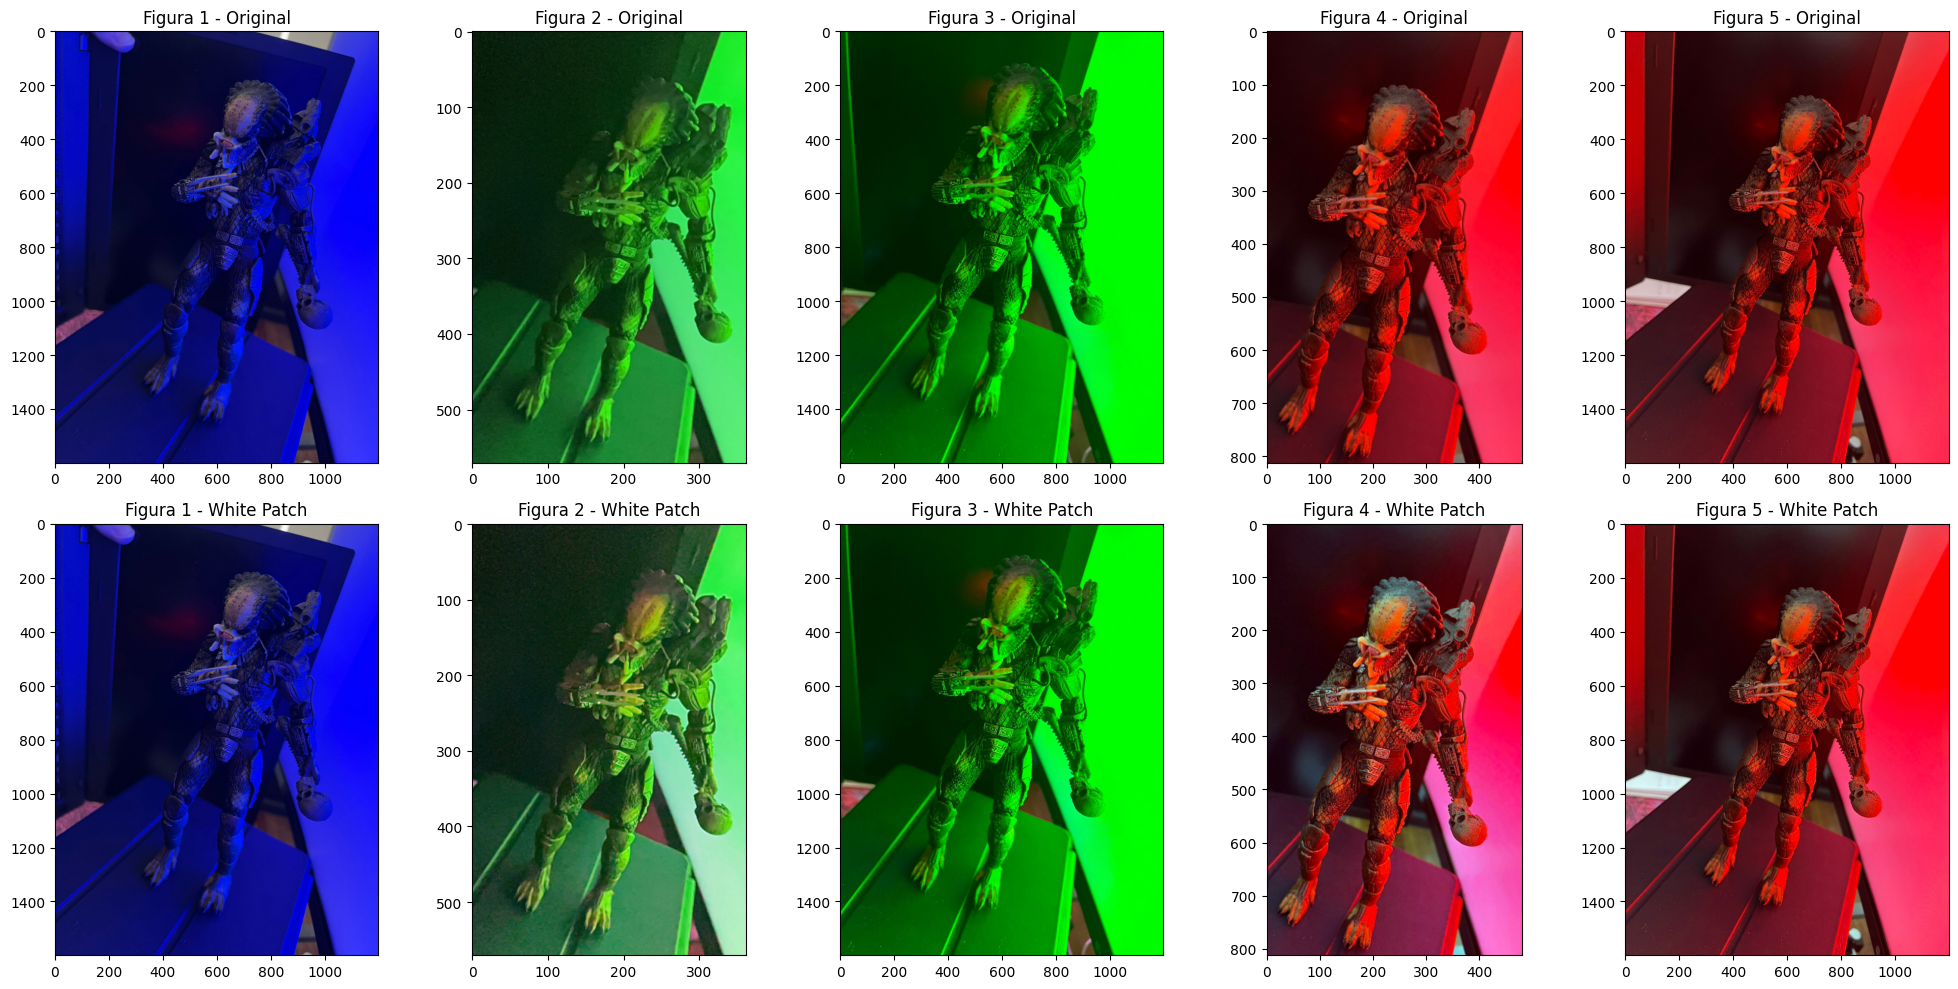

In [8]:
# ---------------- Visualización de White-Patch (Depredador) ---------------- 

img4 = cv.imread(WPimg_paths[3]); img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)
img5 = cv.imread(WPimg_paths[4]); img5 = cv.cvtColor(img5, cv.COLOR_BGR2RGB)
img6 = cv.imread(WPimg_paths[5]); img6 = cv.cvtColor(img6, cv.COLOR_BGR2RGB)
img7 = cv.imread(WPimg_paths[6]); img7 = cv.cvtColor(img7, cv.COLOR_BGR2RGB)
img8 = cv.imread(WPimg_paths[7]); img8 = cv.cvtColor(img8, cv.COLOR_BGR2RGB)

img4_WP = white_patch(img4, show_layers=False)
img5_WP = white_patch(img5, show_layers=False)
img6_WP = white_patch(img6, show_layers=False)
img7_WP = white_patch(img7, show_layers=False)
img8_WP = white_patch(img8, show_layers=False)


fig, axes = plt.subplots(2,5, figsize=(20,10))

axes[0,0].imshow(img4);     axes[0,0].set_title('Figura 1 - Original') 
axes[1,0].imshow(img4_WP);  axes[1,0].set_title('Figura 1 - White Patch')

axes[0,1].imshow(img5);     axes[0,1].set_title('Figura 2 - Original') 
axes[1,1].imshow(img5_WP);  axes[1,1].set_title('Figura 2 - White Patch') 

axes[0,2].imshow(img6);     axes[0,2].set_title('Figura 3 - Original')
axes[1,2].imshow(img6_WP);  axes[1,2].set_title('Figura 3 - White Patch') 

axes[0,3].imshow(img7);     axes[0,3].set_title('Figura 4 - Original')
axes[1,3].imshow(img7_WP);  axes[1,3].set_title('Figura 4 - White Patch') 

axes[0,4].imshow(img8);     axes[0,4].set_title('Figura 5 - Original')
axes[1,4].imshow(img8_WP);  axes[1,4].set_title('Figura 5 - White Patch') 


plt.tight_layout()
plt.show()


### Parte 2
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.


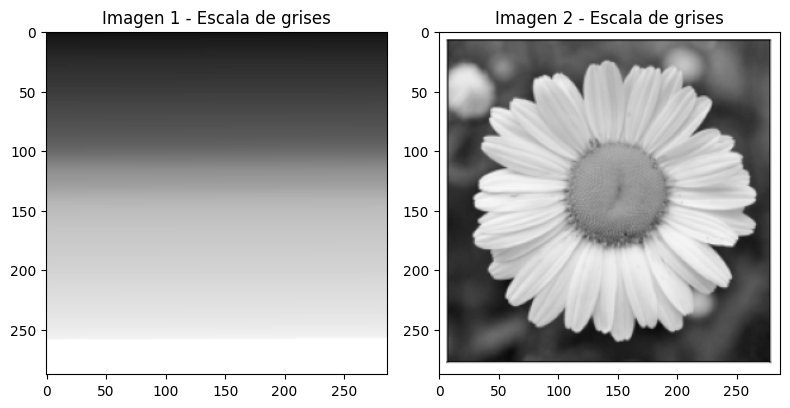

In [12]:
# ---------------- Carga de imágenes ----------------

img1 = cv.imread('img1_tp.png',cv.IMREAD_GRAYSCALE);            img1_color = cv.imread('img1_tp.png',cv.COLOR_BGR2GRAY)
img2 = cv.imread('img2_tp.png',cv.IMREAD_GRAYSCALE);            img2_color = cv.imread('img2_tp.png',cv.COLOR_BGR2RGB)

fig, axes = plt.subplots(1,2, figsize=(8,4))

axes[0].imshow(img1, cmap = 'gray');      axes[0].set_title("Imagen 1 - Escala de grises")
axes[1].imshow(img2, cmap = 'gray');      axes[1].set_title("Imagen 2 - Escala de grises")

plt.tight_layout()
plt.show()

2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si.
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes,
considera que puede ser de utilidad tomar como "features" a los histogramas?

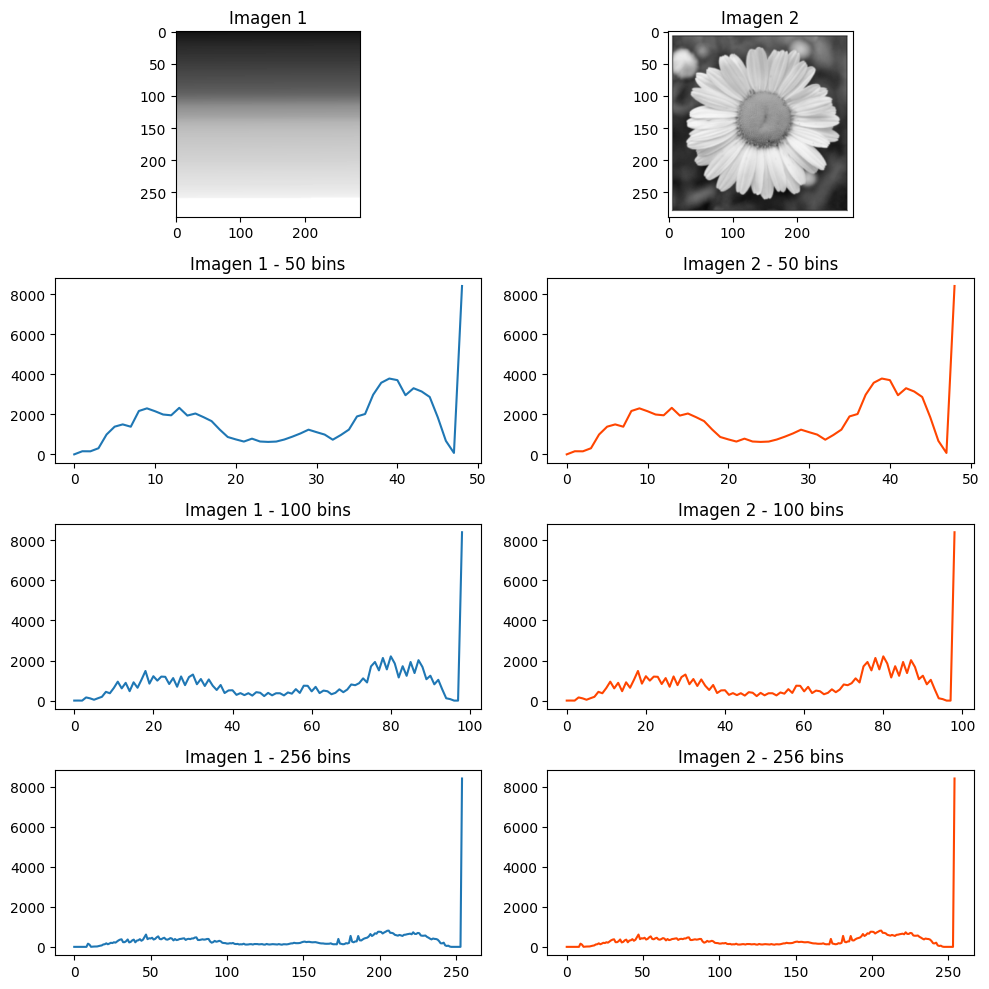

In [70]:
fig, axes = plt.subplots(4,2, figsize = (10, 10)) 

axes[0,0].imshow(img1, cmap = 'gray');      axes[0,0].set_title("Imagen 1")
axes[0,1].imshow(img2, cmap = 'gray');      axes[0,1].set_title("Imagen 2")

hist1, bins1 = np.histogram(img1.ravel(), 49, [0, 256])
hist2, bins2 = np.histogram(img2.ravel(), 49, [0, 256])

axes[1,0].plot(hist1)
axes[1,0].set_title('Imagen 1 - 50 bins')
axes[1,1].plot(hist2, color = 'orangered')
axes[1,1].set_title('Imagen 2 - 50 bins')

hist11, bins11 = np.histogram(img1.ravel(), 99, [0, 256])
hist21, bins21 = np.histogram(img2.ravel(), 99, [0, 256])

axes[2,0].plot(hist11)
axes[2,0].set_title('Imagen 1 - 100 bins')
axes[2,1].plot(hist21, color = 'orangered')
axes[2,1].set_title('Imagen 2 - 100 bins')

hist12, bins12 = np.histogram(img1.ravel(), 255, [0, 256])
hist22, bins22 = np.histogram(img2.ravel(), 255, [0, 256])

axes[3,0].plot(hist12)
axes[3,0].set_title('Imagen 1 - 256 bins')
axes[3,1].plot(hist22, color = 'orangered')
axes[3,1].set_title('Imagen 2 - 256 bins')

plt.tight_layout()
plt.show()


No parece ser adecuado para tomar como feature en un modelo de clasificación/regresión ya que, si bien la imágenes difieren, ambos histogramas son similares, por lo que no estaría permitiendo detectar imágenes entre una y otra.


3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

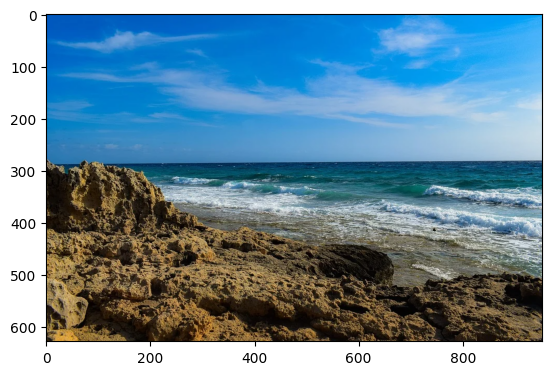

In [94]:
img_beach = cv.imread('segmentacion.png')
img_beach = cv.cvtColor(img_beach, cv.COLOR_BGR2RGB)

plt.imshow(img_beach)

plt.show()

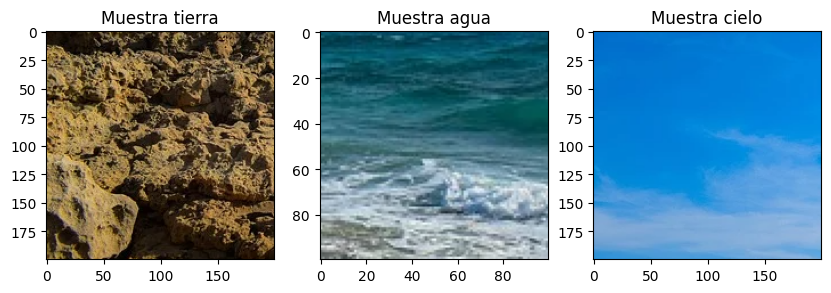

In [105]:
# Hay tomar varias muestras para segmentar tierra | mar | cielo
fig, ax = plt.subplots(1,3, figsize=(10,6))

muestra_sand = img_beach[400:600, 0:200,:]
ax[0].imshow(muestra_sand)
ax[0].set_title('Muestra tierra')

muestra_water = img_beach[300:400, 600:700,:]
ax[1].imshow(muestra_water)
ax[1].set_title('Muestra agua')

muestra_sky = img_beach[0:200, 400:600,:]
ax[2].imshow(muestra_sky)
ax[2].set_title('Muestra cielo')


plt.show()

In [106]:
# Se calculan las medias y desvíos de colores de cada muestra
color_mean_sand, color_std_sand = cv.meanStdDev(muestra_sand)
color_mean_water, color_std_water = cv.meanStdDev(muestra_water)
color_mean_sky, color_std_sky = cv.meanStdDev(muestra_sky)

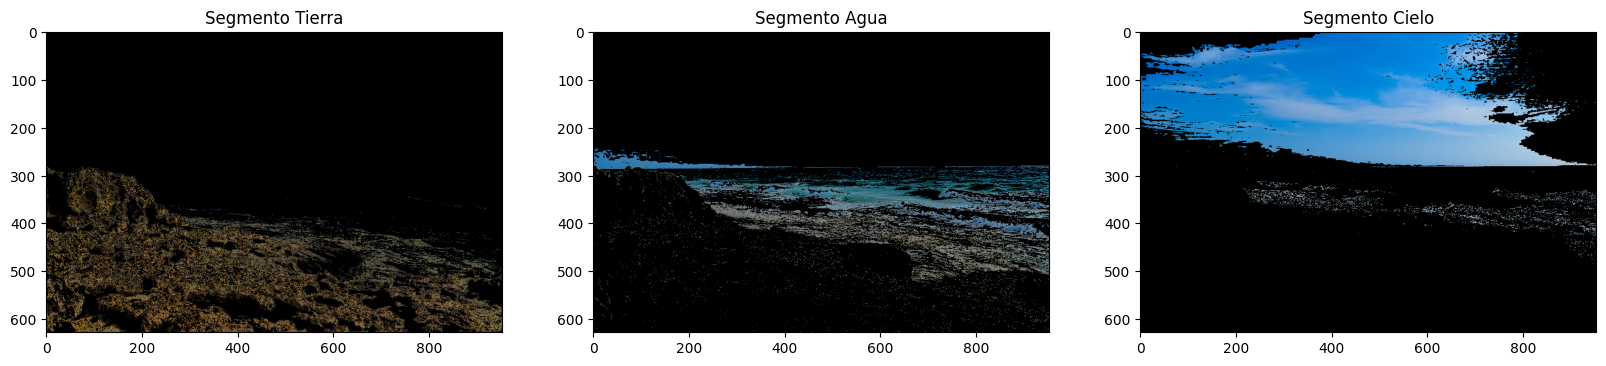

In [130]:
# Ahora se segmenta en base a las medias y hay que jugar con los desvíos para 
# poder hacer más fina la segmentación

fig, ax = plt.subplots(1, 3, figsize=(20,15))

# ------------ Arena ------------

n_sigma = 1

mask = cv.inRange(img_beach, color_mean_sand - color_std_sand * n_sigma, 
                  color_mean_sand + color_std_sand * n_sigma)
img_segmentada = cv.bitwise_and(img_beach, img_beach, mask=mask)

ax[0].imshow(img_segmentada)
ax[0].set_title('Segmento Tierra')

# ------------ Agua ------------

n_sigma = 1

mask = cv.inRange(img_beach, color_mean_water - color_std_water * n_sigma, 
                  color_mean_water + color_std_water * n_sigma)

img_segmentada = cv.bitwise_and(img_beach, img_beach, mask=mask)

ax[1].imshow(img_segmentada)
ax[1].set_title('Segmento Agua')

# ------------ Cielo ------------

n_sigma = 3

mask = cv.inRange(img_beach, color_mean_sky-color_std_sky * n_sigma, 
                  color_mean_sky + color_std_sky * n_sigma)
img_segmentada = cv.bitwise_and(img_beach, img_beach, mask=mask)

ax[2].imshow(img_segmentada)
ax[2].set_title('Segmento Cielo')

plt.show()